In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## Load GEOS Data

In [3]:
ds_ci = xr.open_dataset('../data/ai_ready/CloudImageryDataset.nc')
ds_co = xr.open_dataset('../data/ai_ready/CloudOpticalDepthDataset.nc')
ds_sw = xr.open_dataset('../data/ai_ready/ReflectedSWDataset.nc')

In [119]:
iit =-1

CID = ds_ci['CloudImagery'][iit,...]
COD = ds_co['CloudOpticalDepth'][iit,...]
RSW = ds_sw['ReflectedSW'][iit,...]

In [120]:
def crop_da(ds,min_lon,max_lon,min_lat,max_lat):

    mask_lon = (ds.lon >= min_lon) & (ds.lon <= max_lon)
    mask_lat = (ds.lat >= min_lat) & (ds.lat <= max_lat)

    ds = ds.where(mask_lon & mask_lat, drop=True)
    return ds

In [121]:
# Crop dataset to focus on California region.

LatIndexer, LonIndexer = 'latitude', 'longitude'
min_lon,max_lon,min_lat,max_lat= -125., -114., 32., 42.

COD = crop_da(COD,min_lon,max_lon,min_lat,max_lat)
CID = crop_da(CID,min_lon,max_lon,min_lat,max_lat)

# Variables for each RGB
CIDR = CID.sel(rgb='red')
CIDG = CID.sel(rgb='green')
CIDB = CID.sel(rgb='blue')

In [122]:


df = pd.DataFrame({'cod':np.log(COD.data.flatten()),  # log(COD) is used for PCA, since log(COD) is linearly correlated with RGB values
              'cidr': CIDR.data.flatten(),
              'cidg': CIDG.data.flatten(),
              'cidb': CIDB.data.flatten(),
              })
df.dropna(inplace=True)
df

,cod,cidr,cidg,cidb
1283,2.139986,0.526797,0.541941,0.549263
1284,1.035033,0.474505,0.495787,0.510942
1285,0.848714,0.450480,0.475087,0.493465
1286,0.564162,0.401467,0.426328,0.446324
1290,-0.082844,0.279033,0.322549,0.361082
...,...,...,...,...
175747,2.061426,0.628268,0.649570,0.664797
175748,2.262831,0.639737,0.660771,0.674833
175749,2.291877,0.641215,0.662506,0.676912
175750,2.652246,0.659591,0.679757,0.692372


In [125]:
# DataFrame containing all the variables
df = pd.DataFrame({'cod':np.log(COD.data.flatten()),
              'cidr': CIDR.data.flatten(),
              'cidg': CIDG.data.flatten(),
              'cidb': CIDB.data.flatten(),
              })
df.dropna(inplace=True)
df = df.loc[~((df.cidr==0)|(df.cidr==0)|(df.cidr==0)) & (df.cod>4) & (df.cod<5.1)]

# df
# scaler = StandardScaler()
# df=pd.DataFrame(scaler.fit_transform(df))
df

,cod,cidr,cidg,cidb
11643,4.365843,0.654335,0.670810,0.677603
12150,4.131932,0.622693,0.637701,0.643179
12563,4.138690,0.628520,0.645155,0.651447
12997,4.345823,0.632285,0.646546,0.650722
13456,4.144667,0.621928,0.635908,0.638996
...,...,...,...,...
174465,4.452234,0.686056,0.703168,0.710046
174472,4.885070,0.703260,0.720211,0.727841
174473,5.065683,0.721684,0.741905,0.752480
174898,5.065683,0.724027,0.737303,0.737067


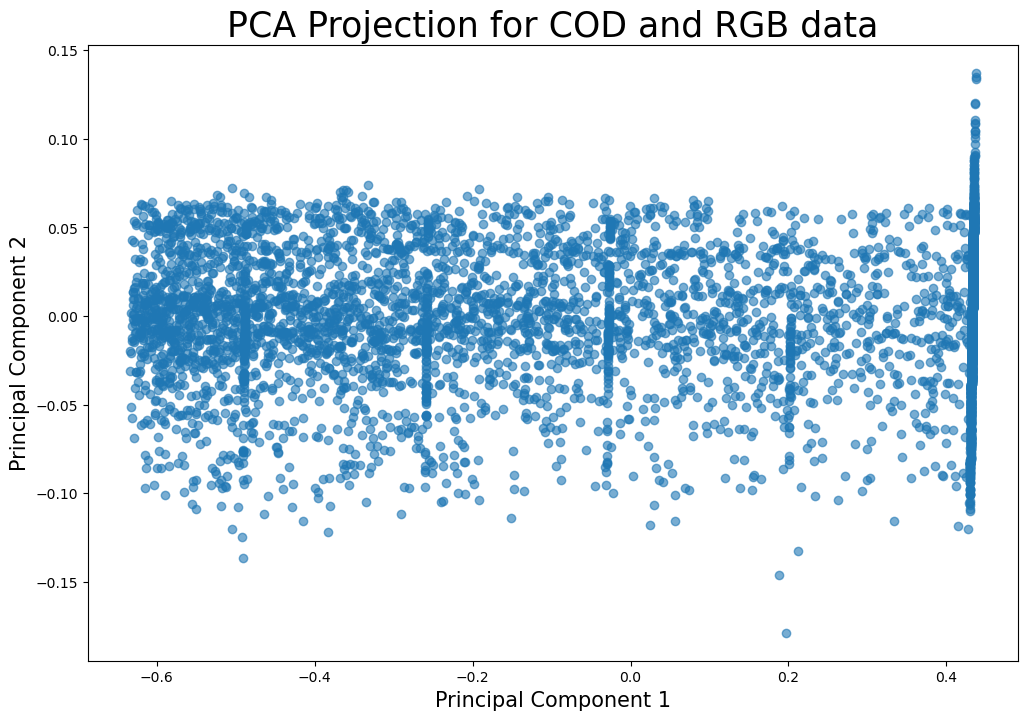

In [128]:
# Perform PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)

# Plot the PCA result with the custom colormap
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.6)

# Set habit names as tick labels for the color bar

plt.title('PCA Projection for COD and RGB data',fontsize=25)
plt.xlabel('Principal Component 1',fontsize=15)
plt.ylabel('Principal Component 2',fontsize=15)
plt.show()